Carregar base de dados

In [1]:
#Importação de bibliotecas
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
#Seed para reprodução de resultados
seed = 10
random.seed(seed)
np.random.seed(seed)

In [4]:
#Leitura base treino
treino = pd.read_csv('horse.csv')

In [5]:
#Leitura base teste
teste = pd.read_csv('horseTest.csv')

In [6]:
treino.info()
treino.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [7]:
treino.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


In [8]:
teste.info()
teste.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                89 non-null     object 
 1   age                    89 non-null     object 
 2   hospital_number        89 non-null     int64  
 3   rectal_temp            73 non-null     float64
 4   pulse                  84 non-null     float64
 5   respiratory_rate       73 non-null     float64
 6   temp_of_extremities    76 non-null     object 
 7   peripheral_pulse       70 non-null     object 
 8   mucous_membrane        79 non-null     object 
 9   capillary_refill_time  85 non-null     object 
 10  pain                   77 non-null     object 
 11  peristalsis            79 non-null     object 
 12  abdominal_distention   77 non-null     object 
 13  nasogastric_tube       66 non-null     object 
 14  nasogastric_reflux     61 non-null     object 
 15  nasogast

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,1,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
1,no,adult,2,39.1,72.0,52.0,warm,NaN,bright_pink,less_3_sec,depressed,hypermotile,slight,none,none,NaN,absent,distend_small,50.0,7.8,NaN,NaN,lived,yes,2111,0,0,no
2,yes,adult,3,37.2,42.0,12.0,warm,normal,normal_pink,less_3_sec,mild_pain,hypomotile,moderate,significant,none,NaN,absent,distend_large,NaN,7.0,NaN,NaN,lived,no,4124,0,0,no
3,no,young,4,38.0,92.0,28.0,normal,normal,bright_pink,less_3_sec,alert,hypomotile,slight,significant,NaN,7.2,normal,normal,37.0,6.1,clear,NaN,died,no,0,0,0,yes
4,yes,adult,5,37.6,64.0,21.0,normal,normal,bright_pink,less_3_sec,depressed,hypomotile,none,none,none,NaN,increased,distend_large,40.0,7.0,clear,NaN,lived,yes,4205,0,0,yes


In [9]:
teste.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,89.000000,73.000000,84.000000,73.000000,14.000000,82.000000,79.000000,29.000000,89.000000,89.000000,89.000000
mean,45.000000,38.175342,74.797619,34.232877,5.028571,45.621951,22.930380,2.782759,4582.415730,218.483146,24.820225
std,25.836021,0.808768,31.099831,19.158346,1.728240,9.196940,26.512955,2.251042,7088.406982,1082.038807,234.153532
min,1.000000,36.000000,36.000000,9.000000,2.000000,31.000000,3.300000,1.000000,0.000000,0.000000,0.000000
25%,23.000000,37.800000,52.500000,20.000000,4.125000,39.000000,6.500000,1.300000,2111.000000,0.000000,0.000000
50%,45.000000,38.100000,65.000000,30.000000,5.150000,44.000000,7.300000,2.000000,3111.000000,0.000000,0.000000
75%,67.000000,38.600000,93.000000,42.000000,6.625000,50.000000,54.500000,3.200000,4206.000000,0.000000,0.000000
max,89.000000,40.800000,184.000000,90.000000,7.200000,74.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


Análise Exploratória

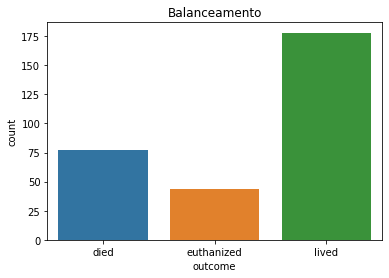

In [10]:
#Análise do balanceamento da base treino
grafico = sns.countplot(data=treino, x='outcome')
plt.title('Balanceamento')
plt.show()

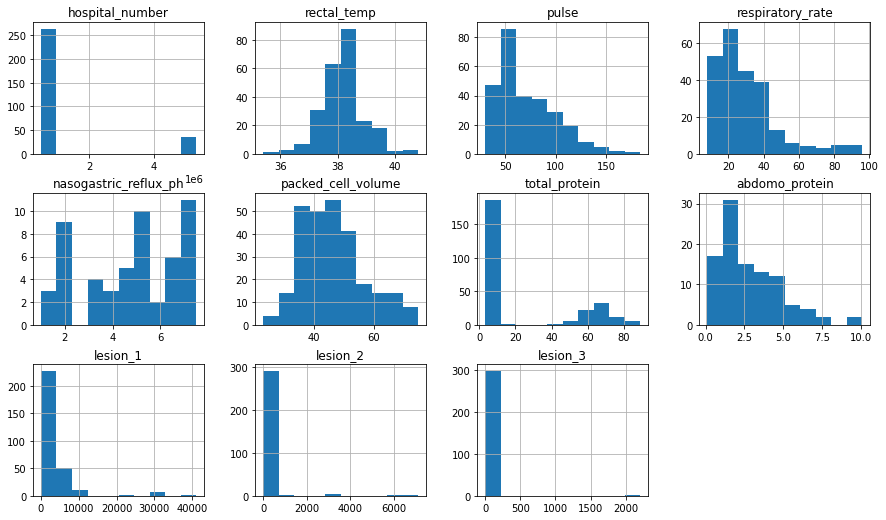

In [11]:
#histogramas da base treino
treino.hist(layout=(5,4), figsize=(15,15))
plt.show()

In [12]:
saidas_treino = treino['outcome'].value_counts()
saidas_treino

lived         178
died           77
euthanized     44
Name: outcome, dtype: int64

In [13]:
#Verifica proporção entre saídas da base treino
print(f'{saidas_treino[0] / len(treino) * 100:.2f}%')
print(f'{saidas_treino[1] / len(treino) * 100:.2f}%')
print(f'{saidas_treino[2] / len(treino) * 100:.2f}%')

59.53%
25.75%
14.72%


In [14]:
saidas_teste = teste['outcome'].value_counts()
saidas_teste

lived         53
died          23
euthanized    13
Name: outcome, dtype: int64

In [15]:
#Verifica proporção entre saídas da base teste
print(f'{saidas_teste[0] / len(teste) * 100:.2f}%')
print(f'{saidas_teste[1] / len(teste) * 100:.2f}%')
print(f'{saidas_teste[2] / len(teste) * 100:.2f}%')

59.55%
25.84%
14.61%


In [16]:
#Verifica shape das bases treino e teste
print(treino.shape)
print(teste.shape)

(299, 28)
(89, 28)


Tratamento dos dados - Atributos desnecessários e Missing values

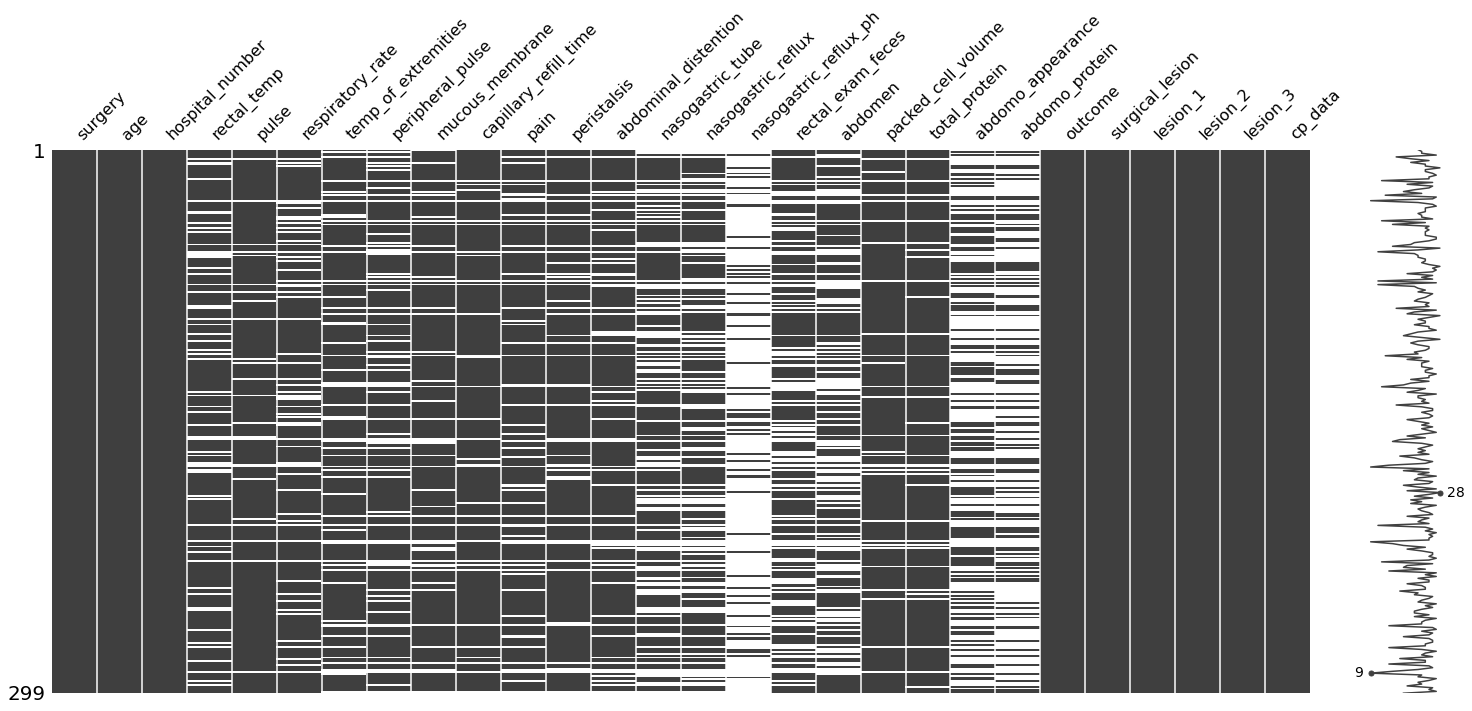

In [17]:
msno.matrix(treino)

In [18]:
#verificar missing por coluna
def missing_cols(df):
  percent_missing = df.apply(lambda x: x.isnull().sum() * 100 / len(df), axis=0).sort_values(ascending=False)
  df_missing = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})
  print(df_missing.head())

In [19]:
#missing cols - Treino
missing_cols(treino)

                           column_name  percent_missing
nasogastric_reflux_ph          surgery        82.274247
abdomo_protein                     age        66.220736
abdomo_appearance      hospital_number        55.183946
abdomen                    rectal_temp        39.464883
nasogastric_reflux               pulse        35.451505


In [20]:
#missing cols - Teste
missing_cols(teste)

                           column_name  percent_missing
nasogastric_reflux_ph          surgery        84.269663
abdomo_protein                     age        67.415730
abdomo_appearance      hospital_number        49.438202
abdomen                    rectal_temp        39.325843
rectal_exam_feces                pulse        38.202247


In [21]:
def tratamento_dados(df):
  #colunas desnecessarias - nao significantes / excesso missing
  atributos_desnecessarios = ['hospital_number', 'cp_data', 'lesion_2', 'lesion_3',
                              'nasogastric_reflux_ph', 'abdomo_protein']
  df.drop(atributos_desnecessarios, axis=1, inplace=True)

  #considerar euthanized e died --> died
  df['outcome'].replace('euthanized', 'died', inplace=True)

  #colunas numericas - preencher NaN com a media
  numerical_cols = df.columns[df.dtypes != object].tolist()
  for coluna in numerical_cols:
    df[coluna] = df[coluna].fillna(df[coluna].mean())
  
  #colunas categoricas - preencher NaN com a moda
  categorical_cols = df.columns[df.dtypes == object].tolist()
  moda = df[categorical_cols].mode()
  for coluna in categorical_cols:
    df[coluna] = df[coluna].fillna(moda[coluna][0])
  
  #separa entrada e saida
  X = df.loc[:, df.columns != 'outcome']
  y = df.loc[:, df.columns == 'outcome']

  #encoding dados categoricos
  X = pd.get_dummies(X, prefix_sep='_', drop_first=True)

  return X, y

In [22]:
X_treino, y_treino = tratamento_dados(treino)
X_teste, y_teste = tratamento_dados(teste)

In [23]:
#encodind do label
le = preprocessing.LabelEncoder()
le.fit(y_treino)
y_teste_enc = le.transform(y_teste)
y_treino_enc = le.transform(y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
X_treino.head()

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,lesion_1,surgery_yes,age_young,temp_of_extremities_cool,temp_of_extremities_normal,temp_of_extremities_warm,peripheral_pulse_increased,peripheral_pulse_normal,peripheral_pulse_reduced,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink,capillary_refill_time_less_3_sec,capillary_refill_time_more_3_sec,pain_depressed,pain_extreme_pain,pain_mild_pain,pain_severe_pain,peristalsis_hypermotile,peristalsis_hypomotile,peristalsis_normal,abdominal_distention_none,abdominal_distention_severe,abdominal_distention_slight,nasogastric_tube_significant,nasogastric_tube_slight,nasogastric_reflux_more_1_liter,nasogastric_reflux_none,rectal_exam_feces_decreased,rectal_exam_feces_increased,rectal_exam_feces_normal,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_yes
0,38.5,66.0,28.0,45.0,8.4,11300,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0
1,39.2,88.0,20.0,50.0,85.0,2208,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0
2,38.3,40.0,24.0,33.0,6.7,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0
3,39.1,164.0,84.0,48.0,7.2,2208,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
4,37.3,104.0,35.0,74.0,7.4,4300,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [25]:
y_treino.head()

,outcome
0,died
1,died
2,lived
3,died
4,died


In [26]:
y_treino_enc

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [27]:
X_teste.head()

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,lesion_1,surgery_yes,age_young,temp_of_extremities_cool,temp_of_extremities_normal,temp_of_extremities_warm,peripheral_pulse_increased,peripheral_pulse_normal,peripheral_pulse_reduced,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink,capillary_refill_time_less_3_sec,capillary_refill_time_more_3_sec,pain_depressed,pain_extreme_pain,pain_mild_pain,pain_severe_pain,peristalsis_hypermotile,peristalsis_hypomotile,peristalsis_normal,abdominal_distention_none,abdominal_distention_severe,abdominal_distention_slight,nasogastric_tube_significant,nasogastric_tube_slight,nasogastric_reflux_more_1_liter,nasogastric_reflux_none,rectal_exam_feces_decreased,rectal_exam_feces_increased,rectal_exam_feces_normal,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_yes
0,37.3,104.0,35.0,74.000000,7.4,4300,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,39.1,72.0,52.0,50.000000,7.8,2111,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1
2,37.2,42.0,12.0,45.621951,7.0,4124,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
3,38.0,92.0,28.0,37.000000,6.1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0
4,37.6,64.0,21.0,40.000000,7.0,4205,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1


In [28]:
y_teste.head()

,outcome
0,died
1,lived
2,lived
3,died
4,lived


In [29]:
y_teste_enc

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1])

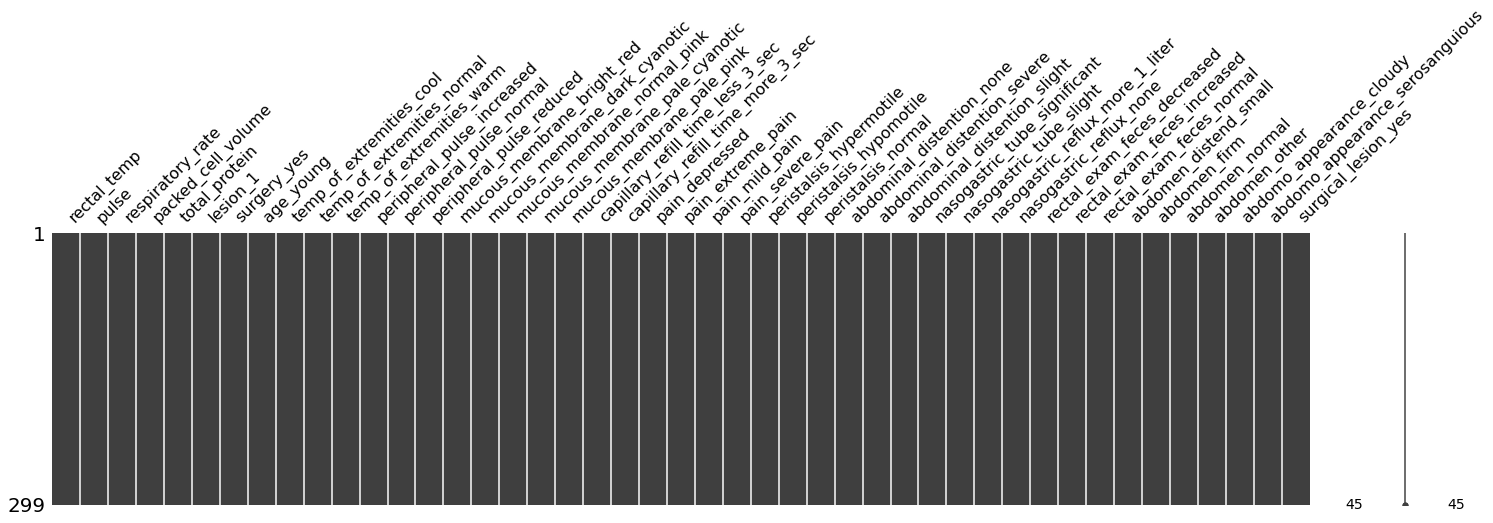

In [30]:
# visualizar novamente os missing
msno.matrix(X_treino, figsize=(25,5));

In [31]:
#verifica missing no outcome
y_treino.isnull().sum()

outcome    0
dtype: int64

Normalização

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_treino)
X_treino = scaler.transform(X_treino)
X_teste = scaler.transform(X_teste)

Avaliação de Modelos

In [33]:
def evaluate_model(y_test, y_pred):

  #Classification report
  from sklearn.metrics import classification_report
  print('Classification Report:')
  print(classification_report(y_test, y_pred))

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  from sklearn.metrics import f1_score
  try:
    f1 = f1_score(y_test, y_pred)
  except:
    f1 = f1_score(y_test, y_pred, average='weighted')
  print('F1: ', f1)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_pred, y_test)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Real')
  plt.ylabel('Previsto')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['lived', 'died']) 
  ax.yaxis.set_ticklabels(['lived', 'died'])
  plt.show()

Árvore de Decisão

In [34]:
# treinar modelo
def train_ad(X_train, y_train, seed):
  model = DecisionTreeClassifier(min_samples_leaf=5, random_state=seed)
  model.fit(X_train, y_train);
  return model

model_ad = train_ad(X_treino, y_treino_enc, seed)

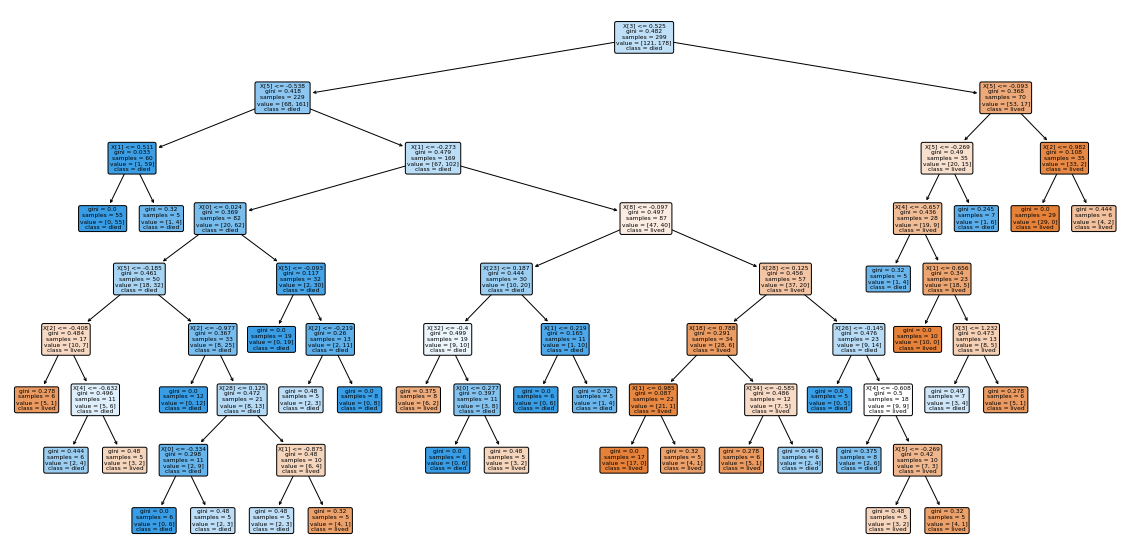

In [35]:
# Visualização gráfica da árvore de decisão
fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(model_ad, class_names=['lived', 'died'], filled=True, rounded=True);

In [36]:
#inferência do teste
y_pred_ad = model_ad.predict(X_teste)
y_pred_ad_treino = model_ad.predict(X_treino)

***** Árvore de Decisão - TESTE *****
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        36
           1       0.85      0.89      0.87        53

    accuracy                           0.84        89
   macro avg       0.84      0.83      0.84        89
weighted avg       0.84      0.84      0.84        89

Acurácia:  0.8426966292134831
Kappa:  0.6705446853516658
F1:  0.8703703703703703


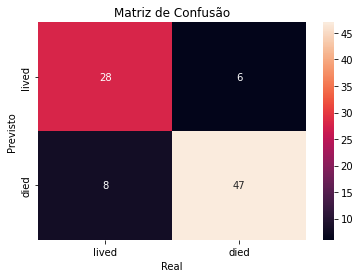

***** Árvore de Decisão - TREINO *****
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       121
           1       0.90      0.91      0.90       178

    accuracy                           0.88       299
   macro avg       0.88      0.88      0.88       299
weighted avg       0.88      0.88      0.88       299

Acurácia:  0.882943143812709
Kappa:  0.7560890339121314
F1:  0.902506963788301


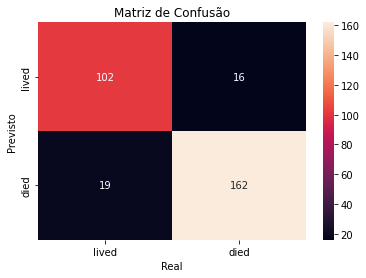

In [37]:
#avaliar modelo
print('***** Árvore de Decisão - TESTE *****')
evaluate_model(y_teste_enc, y_pred_ad)
print('***** Árvore de Decisão - TREINO *****')
evaluate_model(y_treino_enc, y_pred_ad_treino)

SVM

In [38]:
# remover colunas com variância zero
zero_var_filter = VarianceThreshold()
X_treino_svm = zero_var_filter.fit_transform(X_treino)

In [39]:
# colunas com variância zero
(zero_var_filter.variances_ == 0).sum()

0

In [40]:
# treinar modelo
def trainSVM(X_train, y_train, seed):
  model = SVC(random_state=seed)
  model.fit(X_train, y_train)
  return model

model_svm = trainSVM(X_treino_svm, y_treino_enc, seed)

In [41]:
# remover as mesmas colunas removidas por variância zero. Nesse caso não houveram tais atributos. Deixo o código caso tenham um caso que ocorra. Aqui não fará nenhuma diferença.
X_teste_svm = zero_var_filter.transform(X_teste)
X_teste_svm.shape

(89, 45)

In [42]:
#inferência do teste
y_pred_svm = model_svm.predict(X_teste)
y_pred_svm_treino = model_svm.predict(X_treino)

***** SVM - TESTE *****
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        36
           1       0.94      0.94      0.94        53

    accuracy                           0.93        89
   macro avg       0.93      0.93      0.93        89
weighted avg       0.93      0.93      0.93        89

Acurácia:  0.9325842696629213
Kappa:  0.860062893081761
F1:  0.9433962264150944


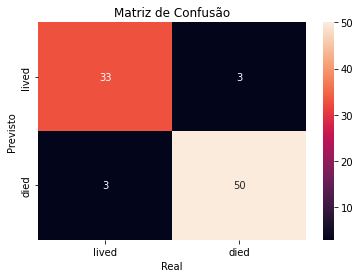

***** SVM - TREINO *****
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       121
           1       0.88      0.94      0.91       178

    accuracy                           0.89       299
   macro avg       0.89      0.88      0.88       299
weighted avg       0.89      0.89      0.89       299

Acurácia:  0.8896321070234113
Kappa:  0.7669304358096138
F1:  0.9105691056910569


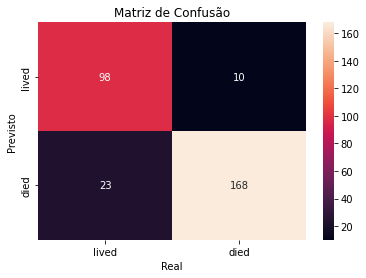

In [43]:
#avaliar modelo
print('***** SVM - TESTE *****')
evaluate_model(y_teste_enc, y_pred_svm)
print('***** SVM - TREINO *****')
evaluate_model(y_treino_enc, y_pred_svm_treino)

Random Forest

In [44]:
# treinar modelo
def train_rf(X_train, y_train, seed):
  model = RandomForestClassifier(min_samples_leaf=5, random_state=seed)
  model.fit(X_train, y_train);
  return model

model_rf = train_rf(X_treino, y_treino_enc, seed)

In [45]:
#inferência do teste
y_pred_rf = model_rf.predict(X_teste)
y_pred_rf_treino = model_rf.predict(X_treino)

***** Random Forest - TESTE *****
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        36
           1       0.88      0.92      0.90        53

    accuracy                           0.88        89
   macro avg       0.88      0.87      0.87        89
weighted avg       0.88      0.88      0.88        89

Acurácia:  0.8764044943820225
Kappa:  0.7399734395750333
F1:  0.8990825688073395


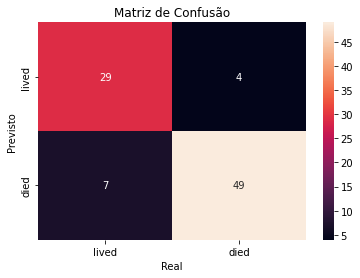

***** Random Forest - TREINO *****
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       121
           1       0.88      0.93      0.90       178

    accuracy                           0.88       299
   macro avg       0.88      0.87      0.87       299
weighted avg       0.88      0.88      0.88       299

Acurácia:  0.8795986622073578
Kappa:  0.7467651625652849
F1:  0.901639344262295


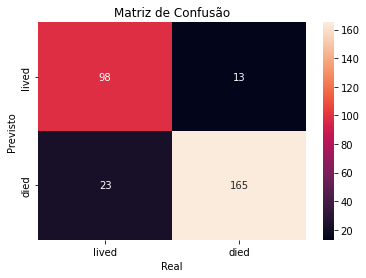

In [46]:
#avaliar modelo
print('***** Random Forest - TESTE *****')
evaluate_model(y_teste_enc, y_pred_rf)
print('***** Random Forest - TREINO *****')
evaluate_model(y_treino_enc, y_pred_rf_treino)

KNN

In [47]:
# treinar modelo
def train_knn(X_train, y_train, n_neighbors=5):
  model = KNeighborsClassifier(n_neighbors=n_neighbors)
  model.fit(X_train, y_train);
  #y_pred = model.predict(X_teste) #inferência do teste
  return model
  #return model, y_pred

model_knn = train_knn(X_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [48]:
#inferência do teste
y_pred_knn = model_knn.predict(X_teste) 
y_pred_knn_treino = model_knn.predict(X_treino) 

***** KNN - TESTE *****
Classification Report:
              precision    recall  f1-score   support

        died       0.78      0.78      0.78        36
       lived       0.85      0.85      0.85        53

    accuracy                           0.82        89
   macro avg       0.81      0.81      0.81        89
weighted avg       0.82      0.82      0.82        89

Acurácia:  0.8202247191011236
Kappa:  0.6268343815513626
F1:  0.8202247191011236


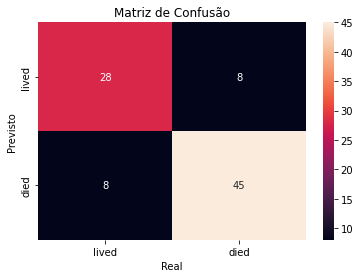

***** KNN - TREINO *****
Classification Report:
              precision    recall  f1-score   support

        died       0.76      0.72      0.74       121
       lived       0.82      0.85      0.83       178

    accuracy                           0.80       299
   macro avg       0.79      0.78      0.79       299
weighted avg       0.79      0.80      0.79       299

Acurácia:  0.7959866220735786
Kappa:  0.5726269419125056
F1:  0.7949151960925571


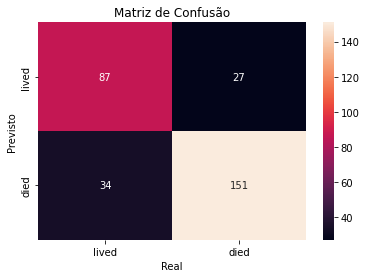

In [49]:
#avaliar modelo
print('***** KNN - TESTE *****')
evaluate_model(y_teste, y_pred_knn)
print('***** KNN - TREINO *****')
evaluate_model(y_treino, y_pred_knn_treino)

Grid Search

In [50]:
# Parâmetros a serem testados
tuned_parameters = [{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]}]

# Executar o grid search
model_grid = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='f1_weighted')
model_grid.fit(X_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             scoring='f1_weighted')

In [51]:
#inferência do teste
y_pred_grid = model_grid.predict(X_teste)
y_pred_grid_treino = model_grid.predict(X_treino)

***** Grid Search - TESTE *****
Classification Report:
              precision    recall  f1-score   support

        died       0.79      0.72      0.75        36
       lived       0.82      0.87      0.84        53

    accuracy                           0.81        89
   macro avg       0.80      0.80      0.80        89
weighted avg       0.81      0.81      0.81        89

Acurácia:  0.8089887640449438
Kappa:  0.598140770252324
F1:  0.807464940862215


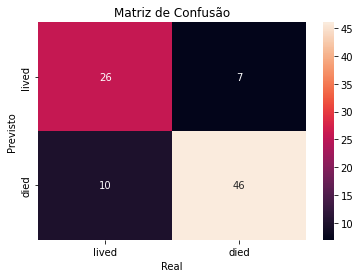

***** Grid Search - TREINO *****
Classification Report:
              precision    recall  f1-score   support

        died       0.76      0.72      0.74       121
       lived       0.82      0.85      0.83       178

    accuracy                           0.80       299
   macro avg       0.79      0.78      0.79       299
weighted avg       0.79      0.80      0.79       299

Acurácia:  0.7959866220735786
Kappa:  0.5726269419125056
F1:  0.7949151960925571


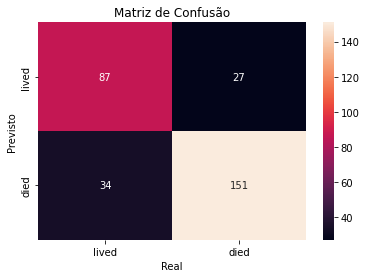

In [52]:
#avaliar modelo
print('***** Grid Search - TESTE *****')
evaluate_model(y_teste, y_pred_grid)
print('***** Grid Search - TREINO *****')
evaluate_model(y_treino, y_pred_grid_treino)

Logistic Regression

In [53]:
# treinar modelo
def train_lr(X_train, y_train):
  model = LogisticRegression()
  model.fit(X_train, y_train);
  return model

model_lr = train_lr(X_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
# inferência do teste
y_pred_lr = model_lr.predict(X_teste)
y_pred_lr_treino = model_lr.predict(X_treino)

***** Logistic Regression - TESTE *****
Classification Report:
              precision    recall  f1-score   support

        died       0.82      0.75      0.78        36
       lived       0.84      0.89      0.86        53

    accuracy                           0.83        89
   macro avg       0.83      0.82      0.82        89
weighted avg       0.83      0.83      0.83        89

Acurácia:  0.8314606741573034
Kappa:  0.6454183266932271
F1:  0.8301161242901897


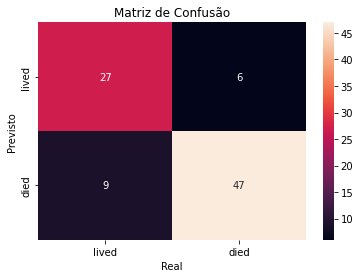

***** Logistic Regression - TREINO *****
Classification Report:
              precision    recall  f1-score   support

        died       0.77      0.73      0.75       121
       lived       0.82      0.85      0.84       178

    accuracy                           0.80       299
   macro avg       0.80      0.79      0.79       299
weighted avg       0.80      0.80      0.80       299

Acurácia:  0.802675585284281
Kappa:  0.5866391733252103
F1:  0.8016392880239487


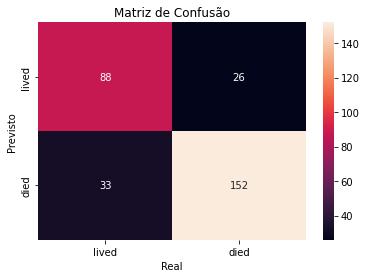

In [55]:
#avaliar modelo
print('***** Logistic Regression - TESTE *****')
evaluate_model(y_teste, y_pred_lr)
print('***** Logistic Regression - TREINO *****')
evaluate_model(y_treino, y_pred_lr_treino)